In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.cluster import KMeans

In [3]:
pip install scikit-plot


Note: you may need to restart the kernel to use updated packages.


In [4]:
import scikitplot as skplt

In [5]:
obesity_data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [6]:
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
obesity_data.shape

(2111, 17)

In [8]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [9]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

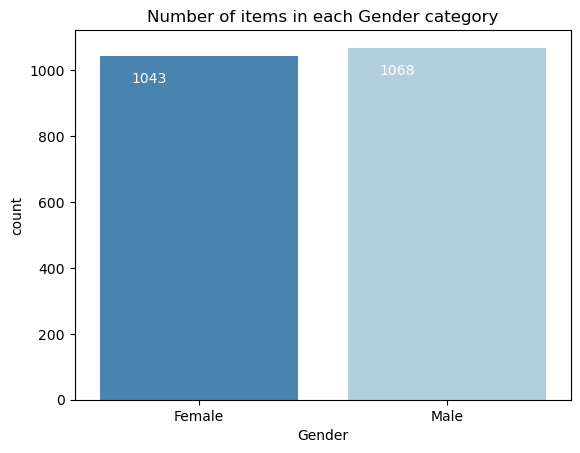

In [10]:
count_values(obesity_data, "Gender")

In [11]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

In [12]:
obesity_data["Age"].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

In [13]:
obesity_data["Age"].median()

22.77789

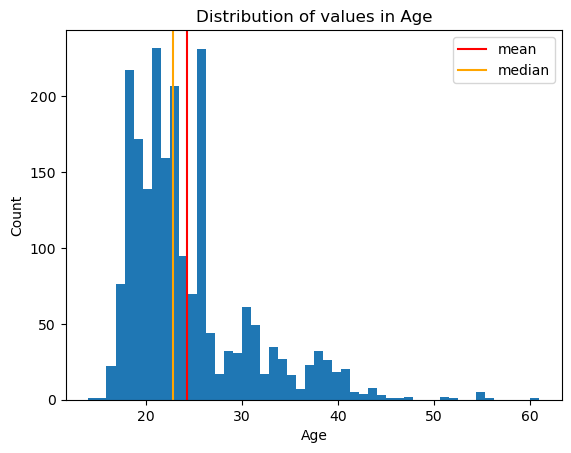

In [14]:
plot_distribution(obesity_data, "Age")

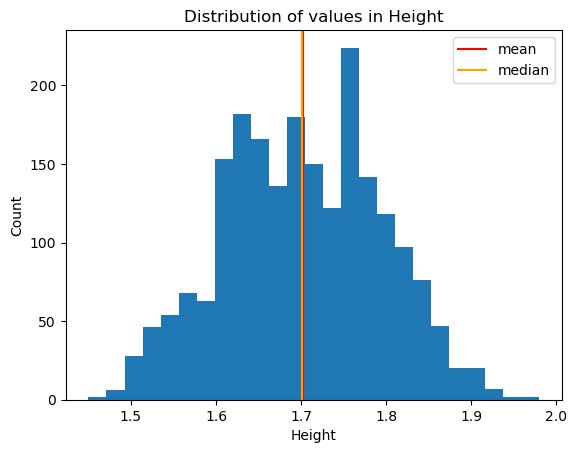

In [15]:
plot_distribution(obesity_data, "Height")

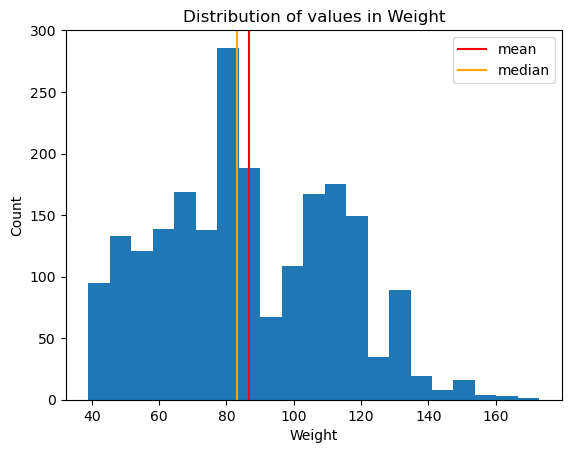

In [16]:
plot_distribution(obesity_data, "Weight")

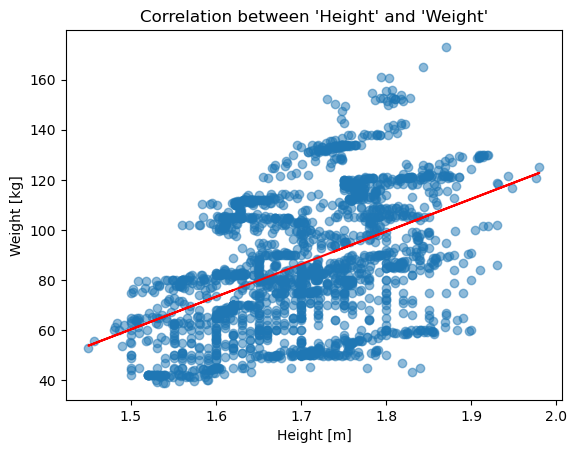

In [17]:
plt.scatter(obesity_data["Height"], obesity_data["Weight"], alpha = 0.5)
m, b = np.polyfit(obesity_data["Height"], obesity_data["Weight"], 1)
plt.plot(obesity_data["Height"], m * obesity_data["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

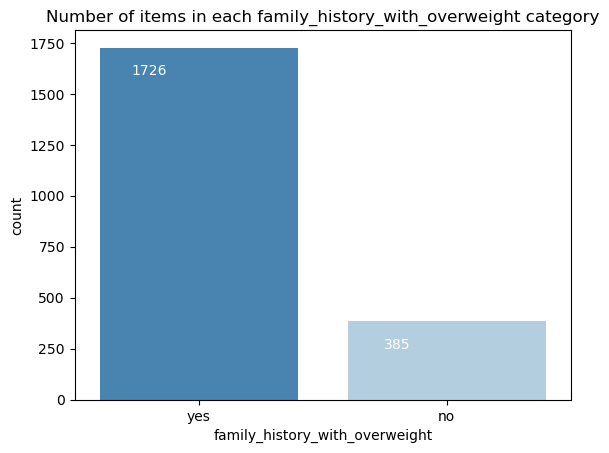

In [18]:
count_values(obesity_data, "family_history_with_overweight")

In [ ]:
Consumption of high caloric food

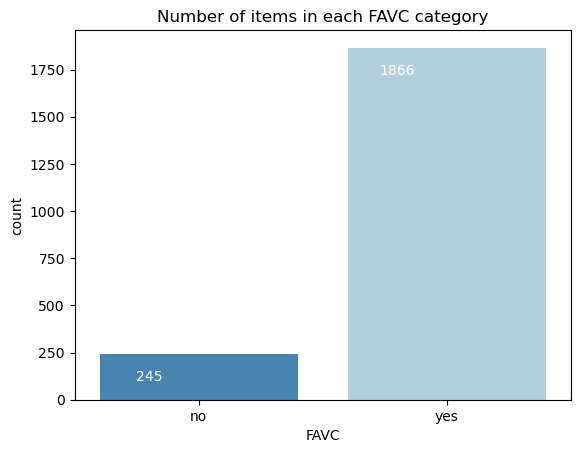

In [19]:
count_values(obesity_data, "FAVC")

In [ ]:
"FCVC" column denotes if people consume vegetables.
Possible answers were "Never", "Sometimes", and "Always". 
It is not clear why values are numeric and not categorical (discrete) 
ones. It could be assumed that "3" means "Always", "2" - "Sometimes",
and "1" - "Never", but it is not clear what the values inbetween mean.

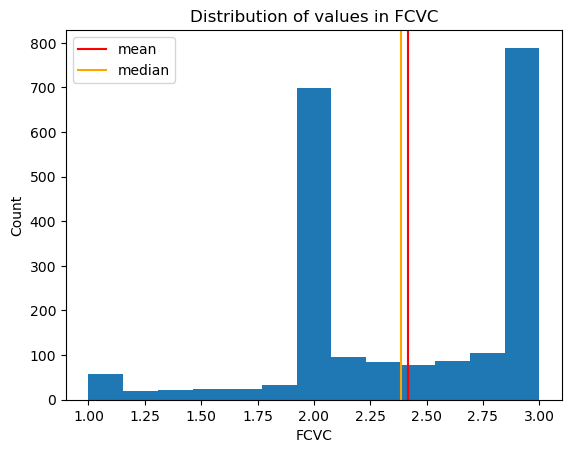

In [20]:
plot_distribution(obesity_data, "FCVC")

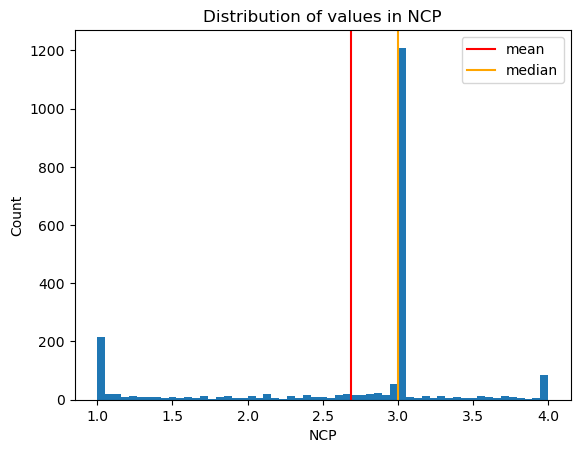

In [21]:
plot_distribution(obesity_data, "NCP")

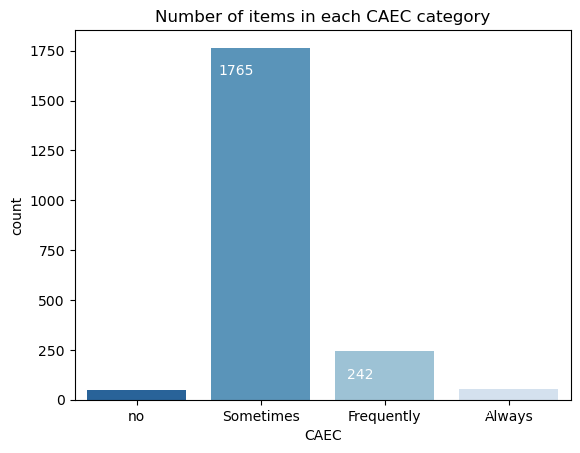

In [22]:
count_values(obesity_data, "CAEC", ["no", "Sometimes", "Frequently", "Always"])

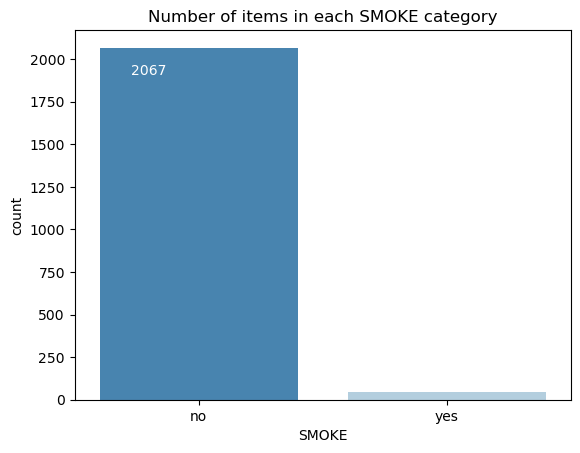

In [23]:
count_values(obesity_data, "SMOKE")

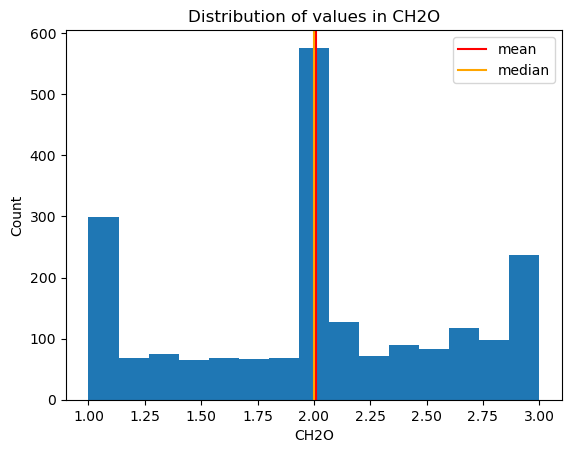

In [24]:
plot_distribution(obesity_data, "CH2O")

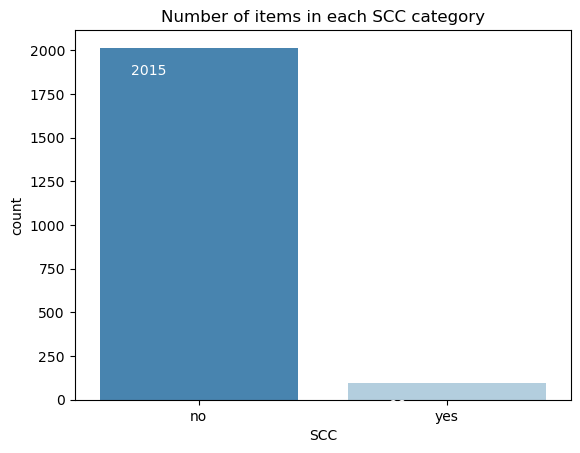

In [25]:
count_values(obesity_data, "SCC")

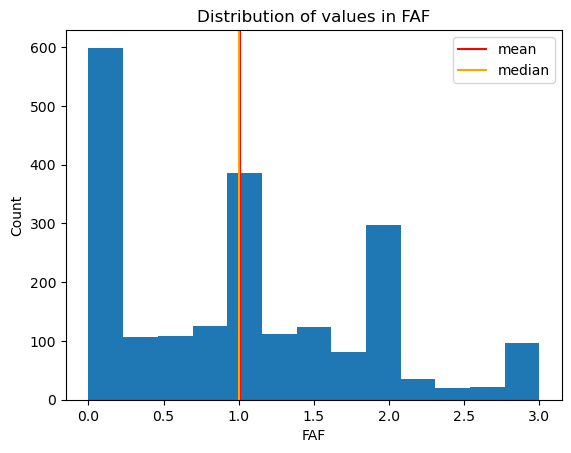

In [26]:
plot_distribution(obesity_data, "FAF")

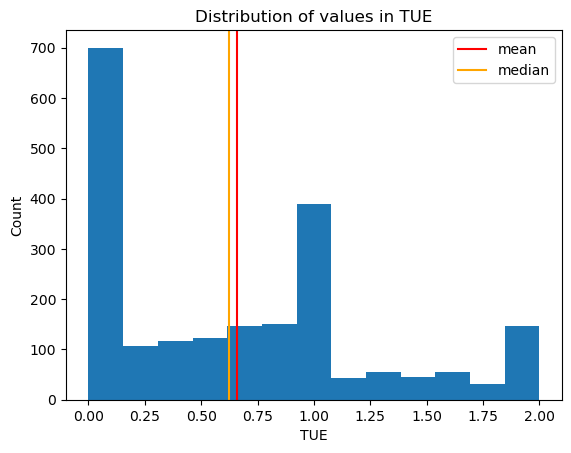

In [27]:
plot_distribution(obesity_data, "TUE")

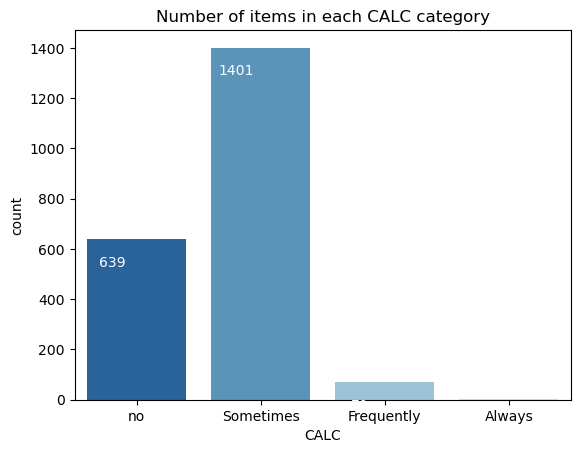

In [28]:
count_values(obesity_data, "CALC")

In [ ]:
#Transportation

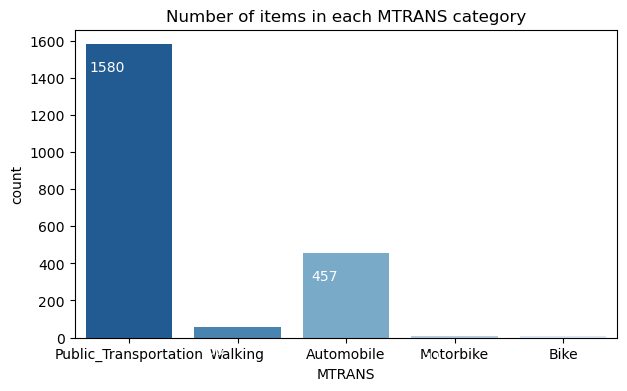

In [29]:
plt.figure(figsize = (7, 4))
count_values(obesity_data, "MTRANS")

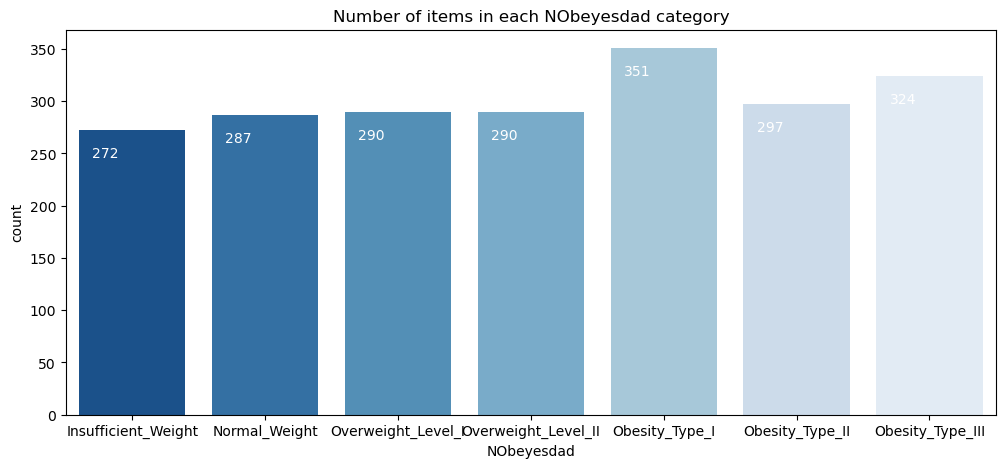

In [30]:
plt.figure(figsize = (12, 5))
count_values(obesity_data, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II",
                                          "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

In [31]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")
    
    plt.show()

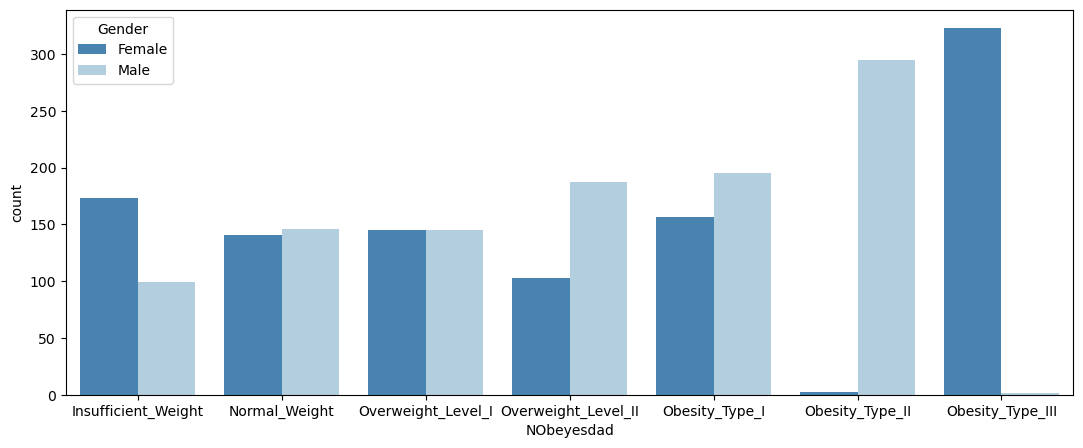

In [32]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

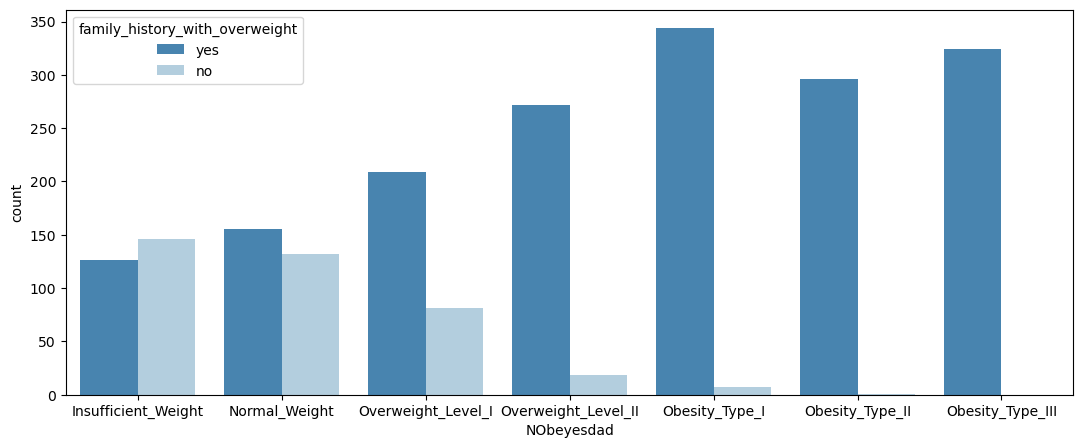

In [33]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "family_history_with_overweight", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

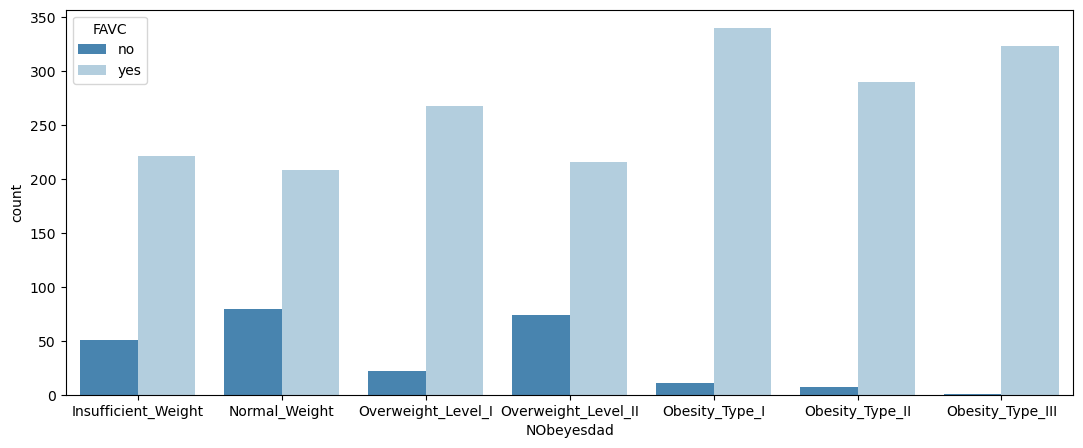

In [34]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "FAVC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

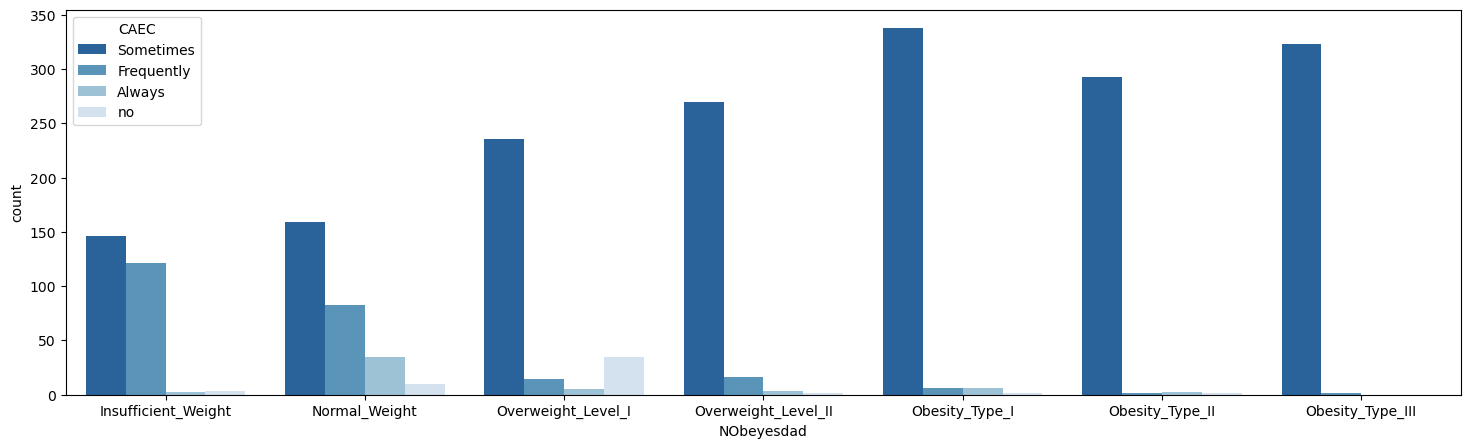

In [35]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "NObeyesdad", "CAEC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

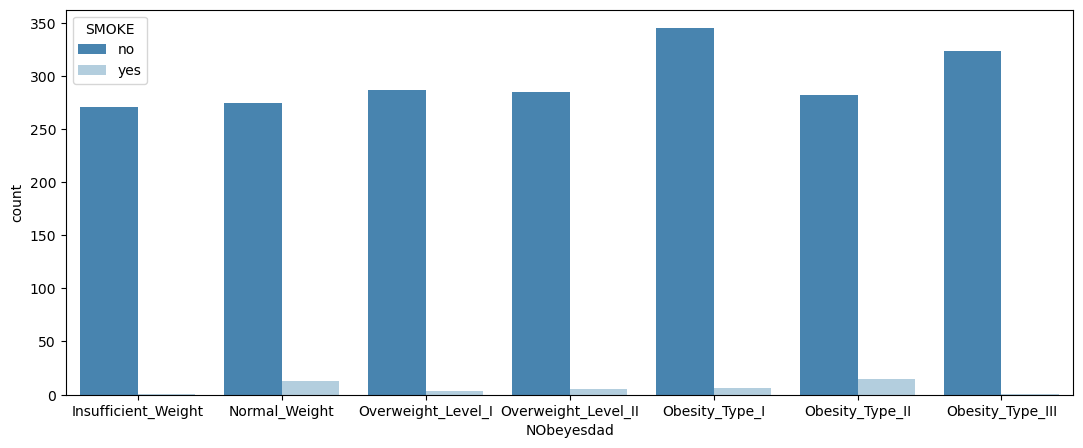

In [36]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "SMOKE", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

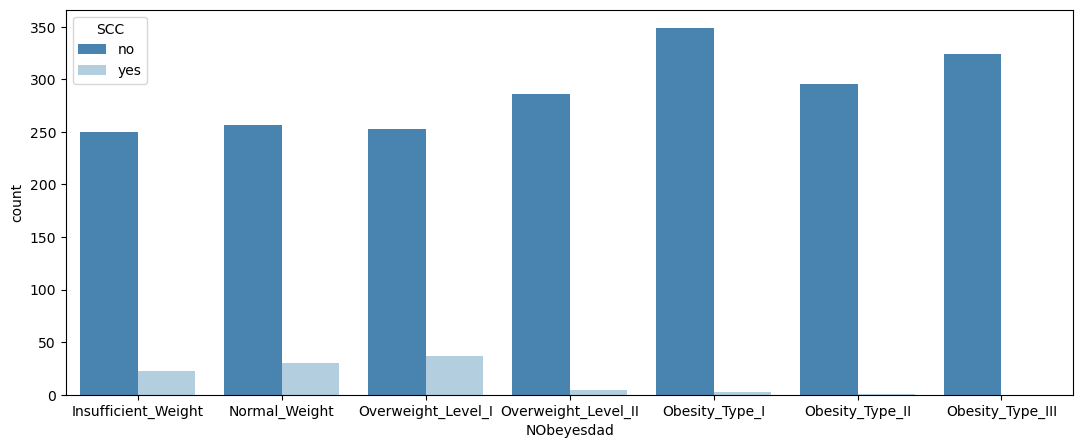

In [37]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "SCC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

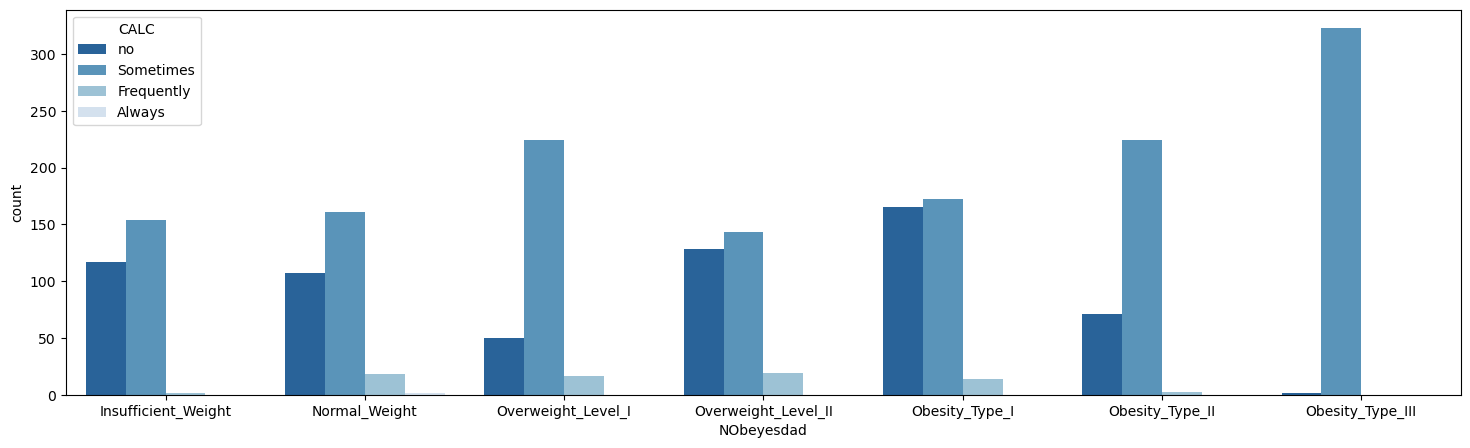

In [38]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "NObeyesdad", "CALC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

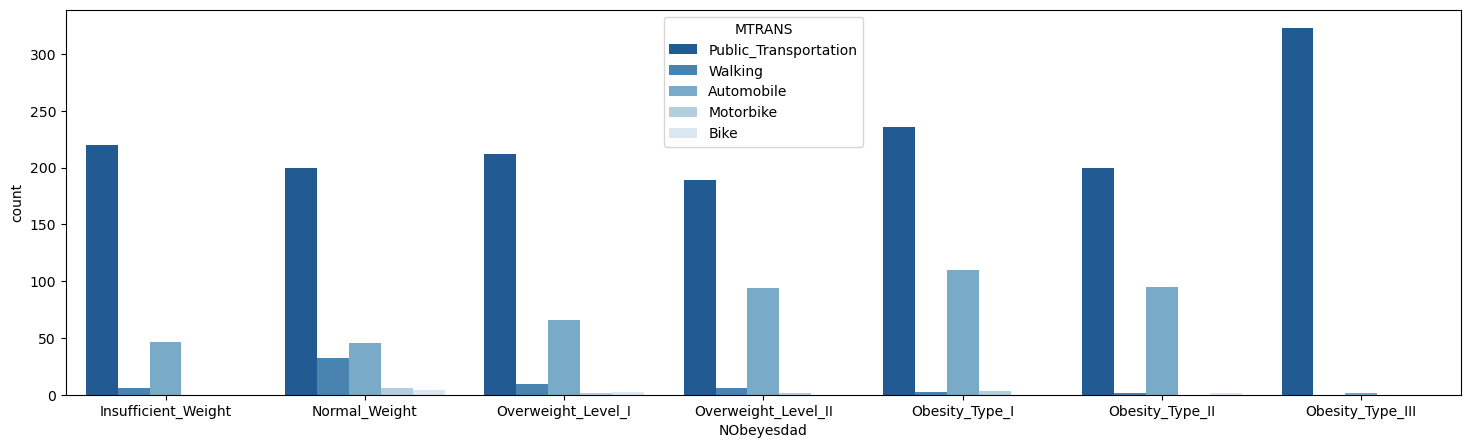

In [39]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "NObeyesdad", "MTRANS", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

In [40]:
obesity_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [41]:
obesity_numeric = obesity_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

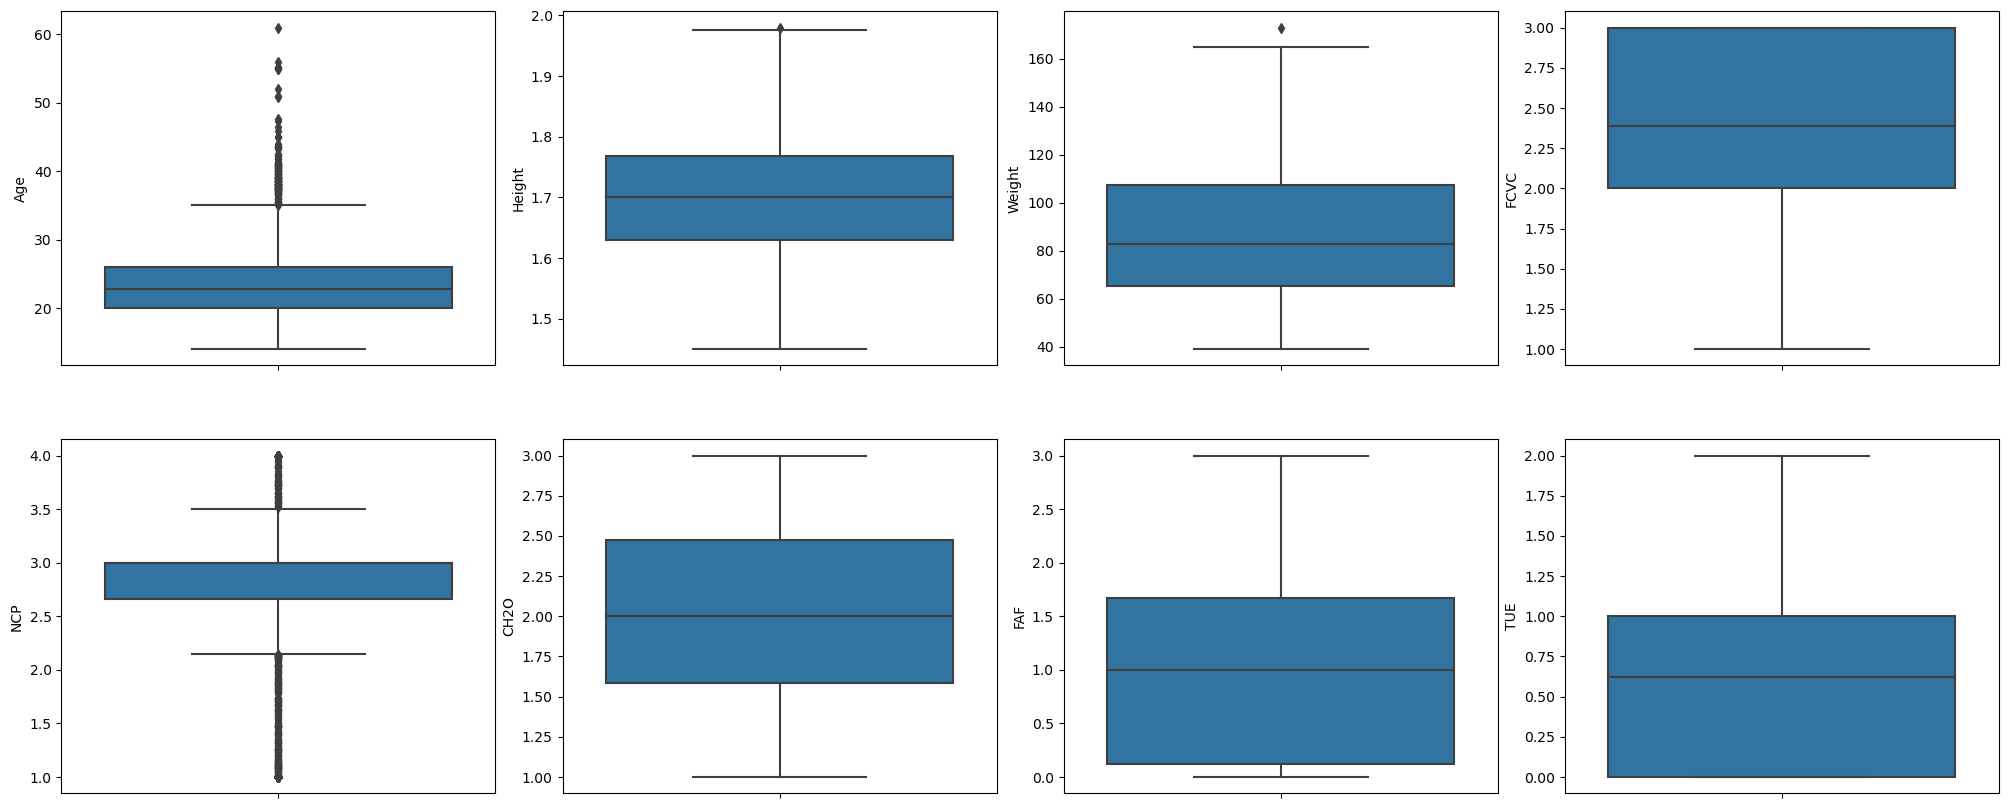

In [42]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 8))
# fig.delaxes(axs[1][3])
idx = 0
axs = axs.flatten()
for k, v in obesity_numeric.items():
    sns.boxplot(y = k, data = obesity_numeric, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

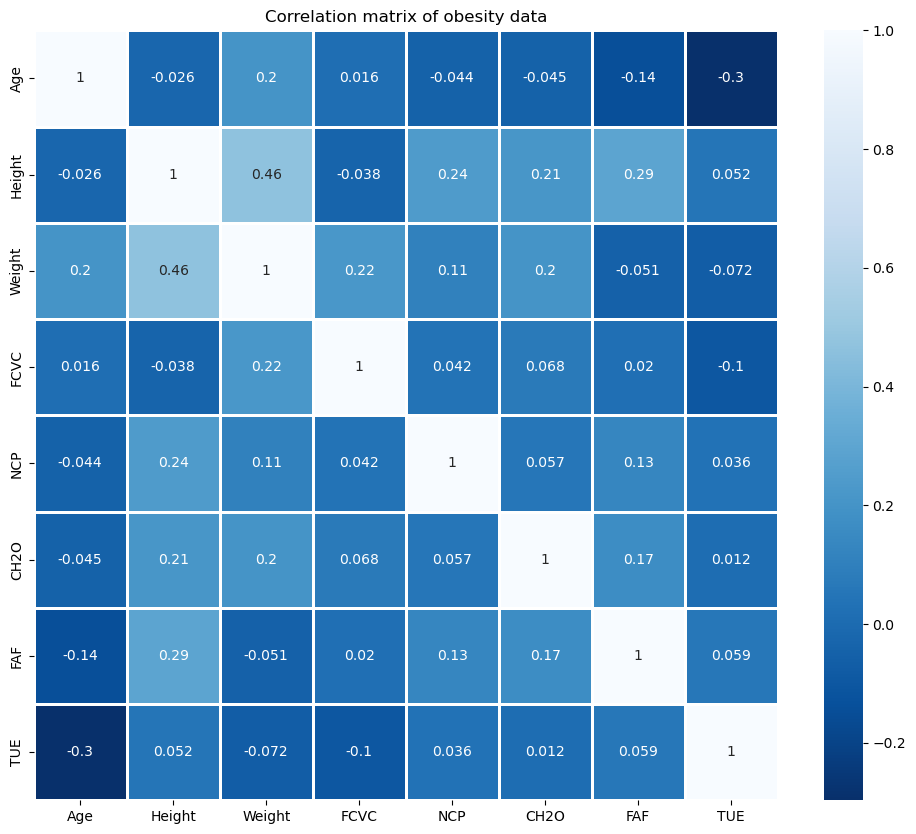

In [43]:
plt.figure(figsize = (12, 10))
sns.heatmap(obesity_data.corr(),
           annot = True,
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white")
plt.title("Correlation matrix of obesity data")
plt.show()

In [44]:
obesity_dummies = pd.get_dummies(obesity_data[["Gender", "family_history_with_overweight", "FAVC", "CAEC",
                                               "SMOKE", "SCC", "CALC", "MTRANS"]])

In [45]:
obesity_lab = obesity_data[["NObeyesdad"]]

In [46]:
obesity_concatenated = pd.concat([obesity_numeric, obesity_dummies, obesity_lab], axis = 1)

In [47]:
obesity_concatenated.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,1,0,0,0,1,0,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,0,1,0,0,0,0,1,0,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,1,0,0,0,0,0,1,0,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,Overweight_Level_II


In [48]:
obesity_label = obesity_concatenated["NObeyesdad"]
obesity_features = obesity_concatenated.drop("NObeyesdad", axis = 1)

In [49]:
obesity_label

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [50]:
obesity_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   uint8  
 9   Gender_Male                         2111 non-null   uint8  
 10  family_history_with_overweight_no   2111 non-null   uint8  
 11  family_history_with_overweight_yes  2111 no

In [51]:
obesity_features = obesity_features.astype("float")

In [52]:
obesity_features.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                           

In [53]:
obesity_features_scaled = MinMaxScaler().fit_transform(obesity_features)

In [54]:
obesity_features_scaled.min(axis = 1), obesity_features_scaled.max(axis = 1)

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

In [55]:
encoder = LabelEncoder()

In [56]:
encoder.fit(obesity_label)

LabelEncoder()

In [57]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [58]:
obesity_labels_encoded = encoder.transform(obesity_label)

In [59]:
obesity_labels_encoded

array([1, 1, 1, ..., 4, 4, 4])

In [60]:
obesity_features_tr, obesity_features_ts, obesity_labels_tr, obesity_labels_ts = train_test_split(
                obesity_features, obesity_labels_encoded, 
                test_size = 0.2, stratify = obesity_labels_encoded,
                random_state = 42) # shuffle=True

In [61]:
obesity_features_tr.shape, obesity_labels_tr.shape, obesity_features_ts.shape, obesity_labels_ts.shape

((1688, 31), (1688,), (423, 31), (423,))

In [62]:
Counter(obesity_labels_tr)

Counter({5: 232, 1: 229, 6: 232, 0: 218, 3: 237, 4: 259, 2: 281})

In [63]:
Counter(obesity_labels_ts)

Counter({0: 54, 1: 58, 6: 58, 4: 65, 3: 60, 2: 70, 5: 58})

In [64]:
f1 = make_scorer(f1_score, average = "weighted")

In [65]:
params = {
    "max_depth": [5, 7, 9, 11, 13, 15]
}

In [66]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 5, scoring = f1)

In [67]:
grid_search.fit(obesity_features_tr, obesity_labels_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15]},
             scoring=make_scorer(f1_score, average=weighted))

In [68]:
grid_search.cv_results_

{'mean_fit_time': array([0.00807061, 0.00889049, 0.00916309, 0.00836606, 0.0084054 ,
        0.00918622]),
 'std_fit_time': array([0.00106919, 0.00079573, 0.00071572, 0.00011119, 0.00014947,
        0.00109066]),
 'mean_score_time': array([0.00305333, 0.00316834, 0.00243688, 0.00219774, 0.00228405,
        0.00277348]),
 'std_score_time': array([4.67041163e-04, 6.77760106e-04, 4.53073093e-05, 2.57655375e-05,
        5.37774233e-05, 6.71812019e-04]),
 'param_max_depth': masked_array(data=[5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5},
  {'max_depth': 7},
  {'max_depth': 9},
  {'max_depth': 11},
  {'max_depth': 13},
  {'max_depth': 15}],
 'split0_test_score': array([0.7683154 , 0.87235527, 0.91915113, 0.90504127, 0.89276374,
        0.90471459]),
 'split1_test_score': array([0.82106824, 0.90898924, 0.92634613, 0.93207895, 0.92636707,
        0.93207895]),
 'split2_test_

In [69]:
grid_search.best_params_

{'max_depth': 11}

In [70]:
model_tree = DecisionTreeClassifier(max_depth = 13, random_state = 42)

In [71]:
def train_predict_score(estimator, train_features, train_labels, test_features, test_labels):
    """
    Function: Trains model, predict classes and computes accuracy and f1 score.
    
    Parameters: estimator, X_train, y_train, X_test, y_test.
    """
    estimator.fit(train_features, train_labels)
    
    print(f"Accuracy on Train data: {accuracy_score(train_labels, estimator.predict(train_features))}")
    print(f"F1 score on Train data: {f1_score(train_labels, estimator.predict(train_features), average = 'weighted')}")
    print(f"Accuracy on Test data: {accuracy_score(test_labels, estimator.predict(test_features))}")
    print(f"F1 on Test data: {f1_score(test_labels, estimator.predict(test_features), average = 'weighted')}")

In [72]:
train_predict_score(model_tree, obesity_features_tr, obesity_labels_tr, obesity_features_ts, obesity_labels_ts)

Accuracy on Train data: 1.0
F1 score on Train data: 1.0
Accuracy on Test data: 0.9148936170212766
F1 on Test data: 0.9152724912457364


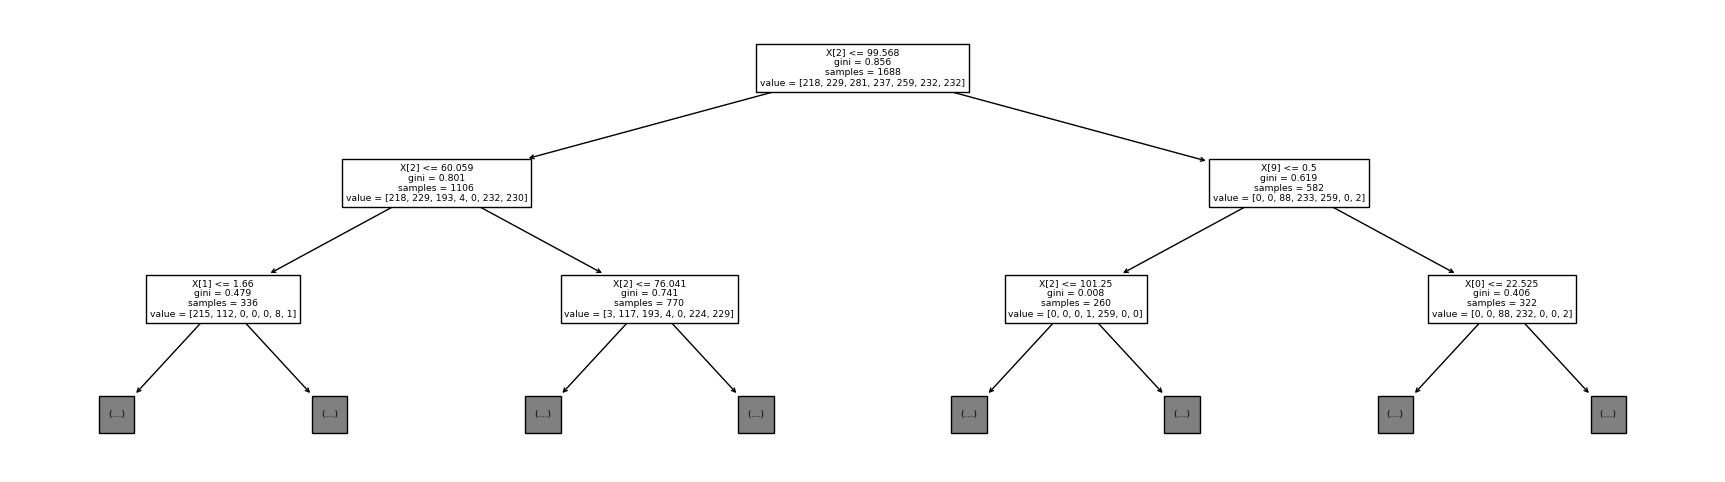

In [73]:
plt.figure(figsize = (22, 6))
plot_tree(model_tree, max_depth = 2)
plt.show()

In [74]:
print(classification_report(obesity_labels_ts, model_tree.predict(obesity_features_ts)))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        54
           1       0.80      0.84      0.82        58
           2       0.91      0.96      0.93        70
           3       0.97      0.95      0.96        60
           4       1.00      0.98      0.99        65
           5       0.86      0.86      0.86        58
           6       0.91      0.91      0.91        58

    accuracy                           0.91       423
   macro avg       0.92      0.91      0.91       423
weighted avg       0.92      0.91      0.92       423



In [75]:
model_tree.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [76]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

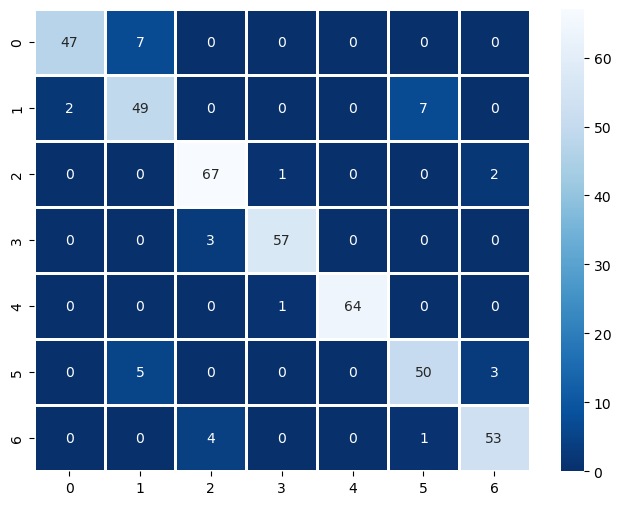

In [77]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(obesity_labels_ts, model_tree.predict(obesity_features_ts)),
           annot = True,
           fmt = ".0f",
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white",
           xticklabels = model_tree.classes_,
           yticklabels = model_tree.classes_)
plt.show()

In [78]:
obesity_score_probability = model_tree.predict_proba(obesity_features_ts)

# obesity_score_probability

In [81]:
roc_auc_score(obesity_labels_ts, obesity_score_probability, multi_class = "ovr")

0.948826099443833

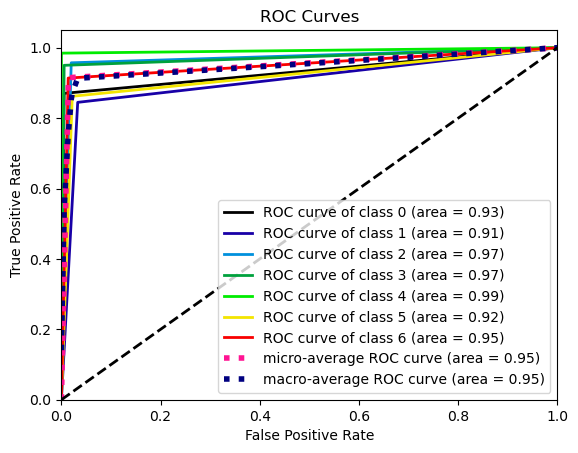

In [82]:
skplt.metrics.plot_roc(obesity_labels_ts, obesity_score_probability)
plt.show()

In [83]:
kmeans = KMeans(n_clusters = 7, init = "k-means++")

In [84]:
model_tree.feature_importances_

array([0.04184926, 0.22082785, 0.47515547, 0.0135702 , 0.00714488,
       0.00561014, 0.00081335, 0.01124707, 0.00060059, 0.15732823,
       0.0006524 , 0.00232294, 0.02176254, 0.00069194, 0.00134318,
       0.00157633, 0.00760256, 0.        , 0.        , 0.00135428,
       0.        , 0.        , 0.        , 0.        , 0.00062654,
       0.02540261, 0.00251765, 0.        , 0.        , 0.        ,
       0.        ])

In [85]:
def plot_clusters(dataset, feature_one, feature_two, labels, title = None):
    """
    Function: Computes and displays clusters.
    
    Parameters: dataset, 2 features, cluster indicator.
    """
    sns.scatterplot(data = dataset, x = feature_one, y = feature_two, hue = labels, palette = "Blues_r")
    if title is not None:
        plt.title(title)
    plt.show()

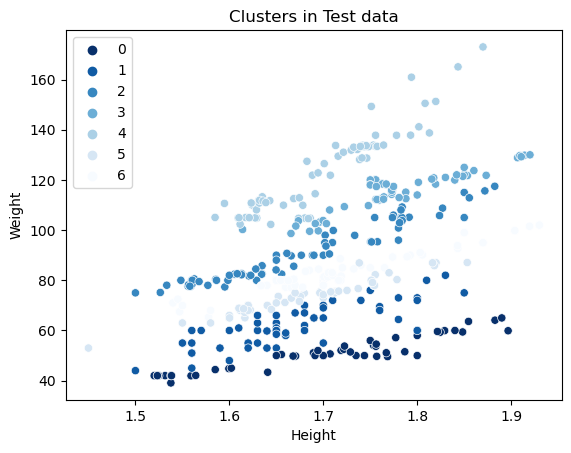

In [86]:
plot_clusters(obesity_features_ts, "Height", "Weight", obesity_labels_ts, "Clusters in Test data")

In [87]:
predicted_labels = kmeans.fit_predict(obesity_features_ts)

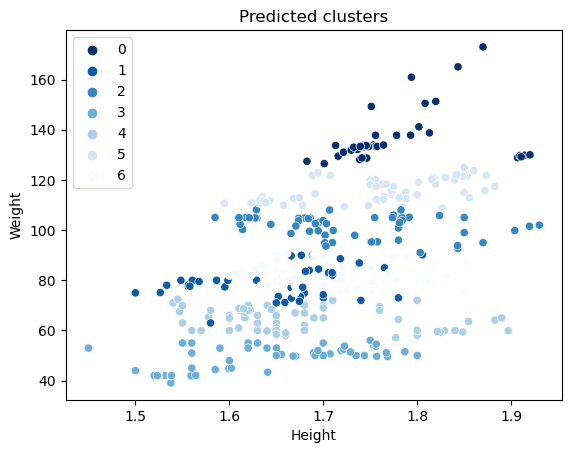

In [88]:
plot_clusters(obesity_features_ts, "Height", "Weight", predicted_labels, "Predicted clusters")

# Conclusion

# References:

In [ ]:

[1] Palechor, F. M., & de la Hoz Manotas, A. (2019).
Dataset for estimation of obesity levels based on eating habits
and physical condition in individuals from Colombia, Peru and Mexico.
Data in Brief, 104344.